In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset and Exploring

In [118]:
loaded_df=pd.read_csv("C:\\Users\\hp\\Downloads\\CarPrice_Assignment.csv")
loaded_df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [119]:
loaded_df.shape

(205, 26)

In [120]:
loaded_df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [121]:
loaded_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# DATA PREPROCESSING

In [122]:
obj = (loaded_df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (loaded_df.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (loaded_df.dtypes == 'float64')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 10
Integer variables: 8
Float variables: 8


<Axes: >

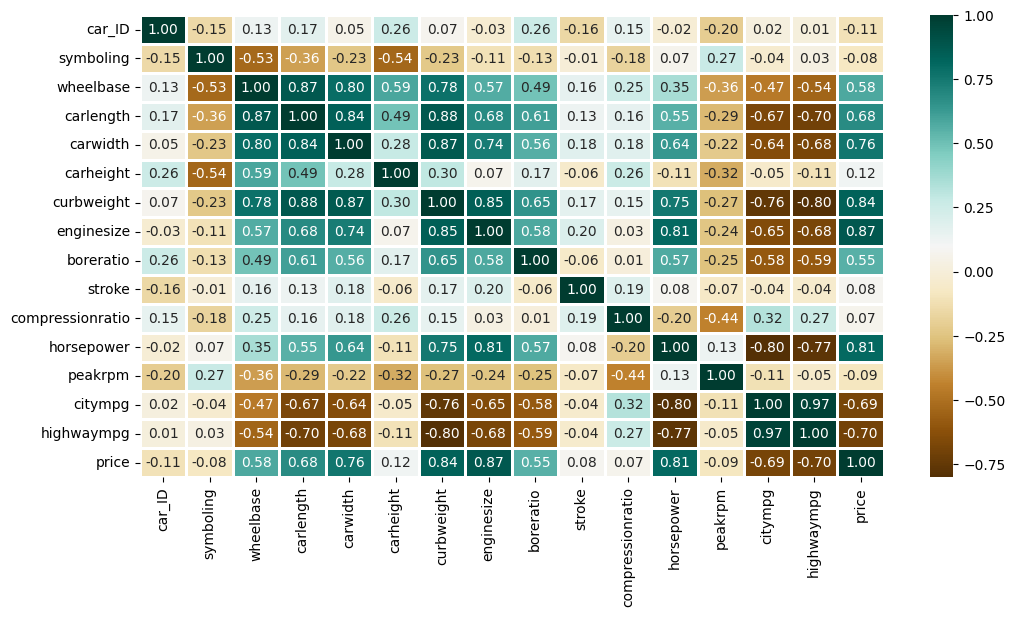

In [123]:
df_numeric=loaded_df.drop(['CarName','fueltype',
                    'aspiration','doornumber',
                    'carbody','drivewheel',
                    'enginelocation','enginetype',
                    'cylindernumber','fuelsystem'],axis=1)
plt.figure(figsize=(12, 6))
sns.heatmap(df_numeric.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)


# Understanding Categorical Features

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

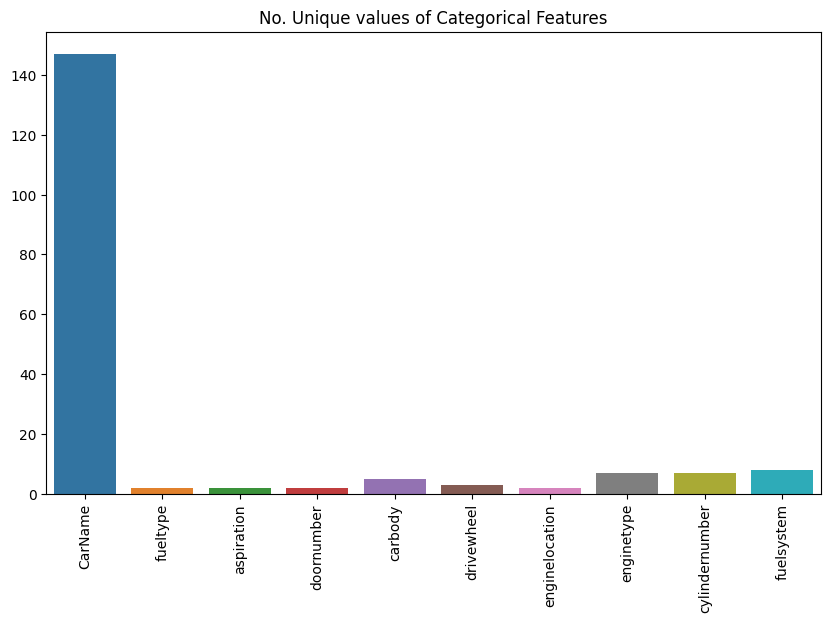

In [124]:
unique_values = []
for col in object_cols:
    unique_values.append(loaded_df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)


# Actual count of Each Category

C:\Users\hp\AppData\Local\Temp\ipykernel_6512\727828372.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


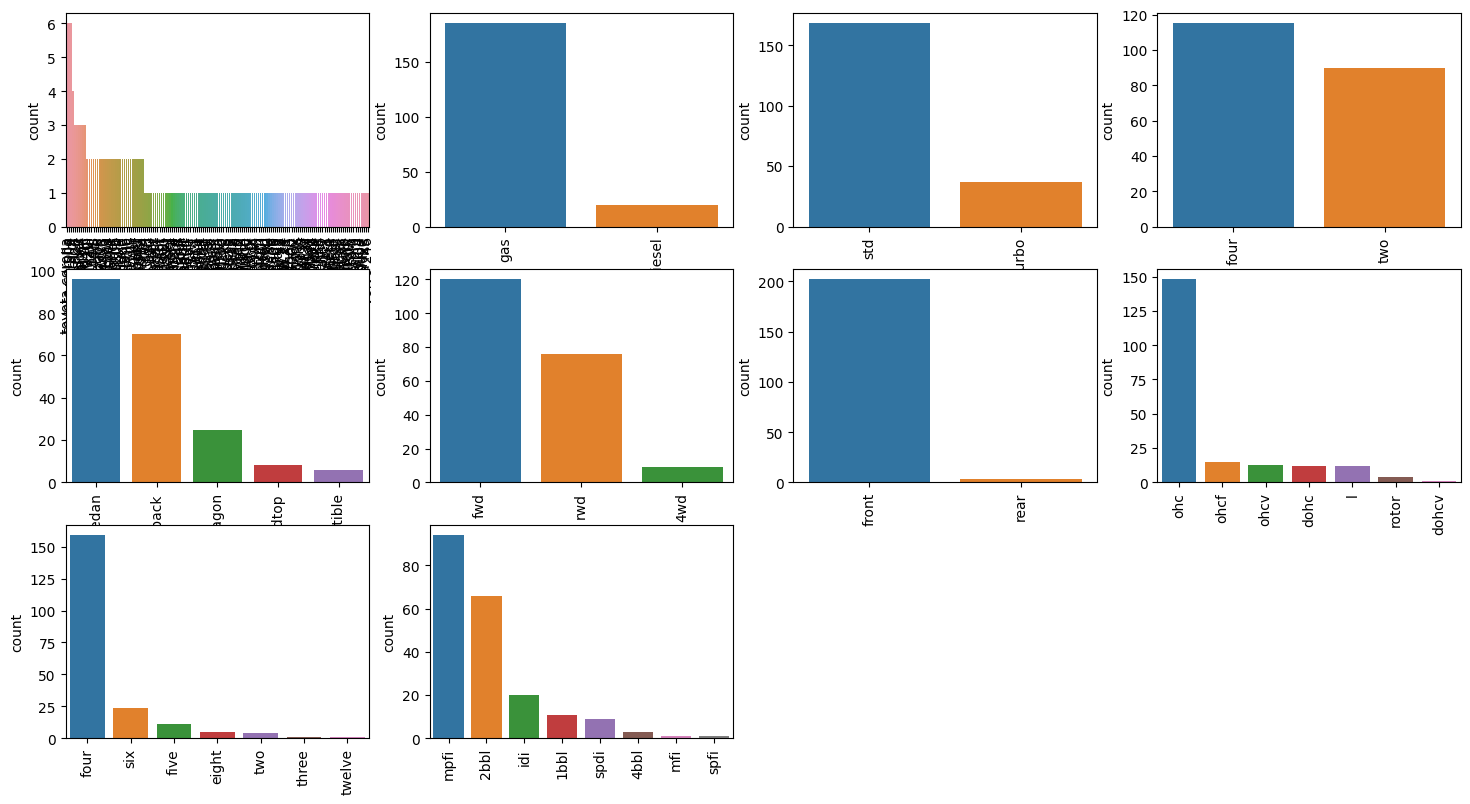

In [125]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = loaded_df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1


In [126]:
loaded_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# One Hot Encoding

I have decided to remove these columns as they appear to be of lesser importance in influencing a car's pricing decision.

In [207]:
column_to_drop=['car_ID','symboling','CarName','fuelsystem','carlength','wheelbase']
df=loaded_df.drop(columns=column_to_drop,axis=1)

In [208]:
from sklearn.preprocessing import OneHotEncoder

s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
   len(object_cols))


Categorical variables:
['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber']
No. of. categorical features:  8


In [209]:
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [210]:
df_final.shape

(205, 42)

In [211]:
df_final.head(2)

,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Feature Scaling

In [212]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


scaled_data = scaler.fit_transform(df_final)
scaled_data

array([[-0.84478235, -2.0204173 , -0.01456628, ..., -0.070014  ,
        -0.070014  , -0.14106912],
       [-0.84478235, -2.0204173 , -0.01456628, ..., -0.070014  ,
        -0.070014  , -0.14106912],
       [-0.19056612, -0.54352748,  0.51488192, ..., -0.070014  ,
        -0.070014  , -0.14106912],
       ...,
       [ 1.39824472,  0.72823876,  0.87875722, ..., -0.070014  ,
        -0.070014  , -0.14106912],
       [ 1.39824472,  0.72823876,  1.27343679, ..., -0.070014  ,
        -0.070014  , -0.14106912],
       [ 1.39824472,  0.72823876,  0.97502053, ..., -0.070014  ,
        -0.070014  , -0.14106912]])

In [213]:
new_df=pd.DataFrame(scaled_data)
new_df.columns=df_final.columns
new_df

,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391,-0.328798,0.328798,0.469295,-0.469295,-1.130388,1.130388,5.759051,-0.201517,-0.720082,-0.938474,-0.372678,-0.214286,-1.188177,1.302831,0.121867,-0.121867,4.010403,-0.070014,-0.249351,-1.611363,-0.280976,-0.260208,-0.141069,-0.158114,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069
1,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461,-0.328798,0.328798,0.469295,-0.469295,-1.130388,1.130388,5.759051,-0.201517,-0.720082,-0.938474,-0.372678,-0.214286,-1.188177,1.302831,0.121867,-0.121867,4.010403,-0.070014,-0.249351,-1.611363,-0.280976,-0.260208,-0.141069,-0.158114,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069
2,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461,-0.328798,0.328798,0.469295,-0.469295,-1.130388,1.130388,-0.173640,-0.201517,1.388730,-0.938474,-0.372678,-0.214286,-1.188177,1.302831,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,-1.611363,-0.280976,3.843076,-0.141069,-0.158114,-0.238120,-1.859172,2.746210,-0.070014,-0.070014,-0.141069
3,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485,-0.328798,0.328798,0.469295,-0.469295,0.884652,-0.884652,-0.173640,-0.201517,-0.720082,1.065559,-0.372678,-0.214286,0.841625,-0.767559,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.158114,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069
4,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668,-0.328798,0.328798,0.469295,-0.469295,0.884652,-0.884652,-0.173640,-0.201517,-0.720082,1.065559,-0.372678,4.666667,-1.188177,-0.767559,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.158114,4.199567,-1.859172,-0.364138,-0.070014,-0.070014,-0.141069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.398245,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490,0.447752,-0.328798,0.328798,0.469295,-0.469295,0.884652,-0.884652,-0.173640,-0.201517,-0.720082,1.065559,-0.372678,-0.214286,-1.188177,1.302831,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.158114,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069
201,1.351515,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195,0.723810,-0.328798,0.328798,-2.130854,2.130854,0.884652,-0.884652,-0.173640,-0.201517,-0.720082,1.065559,-0.372678,-0.214286,-1.188177,1.302831,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.158114,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069
202,1.398245,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332,1.029983,-0.328798,0.328798,0.469295,-0.469295,0.884652,-0.884652,-0.173640,-0.201517,-0.720082,1.065559,-0.372678,-0.214286,-1.188177,1.302831,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,-1.611363,-0.280976,3.843076,-0.1410

In [214]:
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [215]:
pd.set_option('display.max_columns', None)
df.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0


# train_test_split

In [217]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = new_df.drop(['price'], axis=1)
Y = new_df['price']
 

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=42)

In [218]:
X_train

,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
66,0.089812,0.276967,0.278074,0.170739,0.371023,1.229370,2.992540,-0.814171,-1.944265,0.885740,1.200761,3.041381,-3.041381,0.469295,-0.469295,0.884652,-0.884652,-0.17364,-0.201517,-0.720082,1.065559,-0.372678,-0.214286,-1.188177,1.302831,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.158114,-0.23812,0.537874,-0.364138,-0.070014,-0.070014,-0.141069
111,1.164596,1.220535,1.000049,-0.166277,0.482059,-3.405717,-0.439775,-0.231119,-0.262960,-0.953012,-0.982764,-0.328798,0.328798,0.469295,-0.469295,0.884652,-0.884652,-0.17364,-0.201517,-0.720082,1.065559,-0.372678,-0.214286,-1.188177,1.302831,0.121867,-0.121867,-0.249351,-0.070014,4.010403,-1.611363,-0.280976,-0.260208,-0.141069,-0.158114,-0.23812,0.537874,-0.364138,-0.070014,-0.070014,-0.141069
153,-1.078431,2.205129,-0.530538,-0.840310,-1.035435,-0.720563,-0.288349,-1.067671,-0.683286,0.885740,0.909625,-0.328798,0.328798,0.469295,-0.469295,0.884652,-0.884652,-0.17364,-0.201517,-0.720082,-0.938474,2.683282,-0.214286,0.841625,-0.767559,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.158114,-0.23812,0.537874,-0.364138,-0.070014,-0.070014,-0.141069
96,-0.984972,0.317992,-1.125445,-0.719947,-0.665314,0.110556,-0.187398,-0.890221,0.157366,0.885740,0.909625,-0.328798,0.328798,0.469295,-0.469295,0.884652,-0.884652,-0.17364,-0.201517,-0.720082,1.065559,-0.372678,-0.214286,0.841625,-0.767559,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.158114,-0.23812,0.537874,-0.364138,-0.070014,-0.070014,-0.141069
38,-0.330755,-0.174305,-0.513210,-0.407003,-0.665314,1.037573,-0.288349,-0.459269,1.418345,0.272823,0.327351,-0.328798,0.328798,0.469295,-0.469295,-1.130388,1.130388,-0.17364,-0.201517,1.388730,-0.938474,-0.372678,-0.214286,0.841625,-0.767559,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.158114,-0.23812,0.537874,-0.364138,-0.070014,-0.070014,-0.141069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.930947,-1.651195,1.123266,1.302152,0.371023,0.046624,-0.288349,1.416637,0.157366,-0.953012,-0.837195,-0.328798,0.328798,0.469295,-0.469295,-1.130388,1.130388,-0.17364,-0.201517,1.388730,-0.938474,-0.372678,-0.214286,-1.188177,1.302831,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,-1.611363,-0.280976,3.843076,-0.141069,-0.158114,-0.23812,-1.859172,2.746210,-0.070014,-0.070014,-0.141069
14,0.463650,0.810288,0.961544,0.892917,-0.073121,-0.209105,-0.288349,0.427984,-1.839184,-0.799782,-0.837195,-0.328798,0.328798,0.469295,-0.469295,0.884652,-0.884652,-0.17364,-0.201517,-0.720082,1.065559,-0.372678,-0.214286,-1.188177,1.302831,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.158114,-0.23812,-1.859172,2.746210,-0.070014,-0.070014,-0.141069
92,-0.984972,0.317992,-1.188979,-0.719947,-0.665314,0.110556,-0.187398,-0.890221,0.157366,0.885740,0.909625,-0.328798,0.328798,0.469295,-0.469295,0.884652,-0.884652,-0.17364,-0.201517,-0.720082,1.065559,-0.372678,-0.214286,0.841625,-0.767559,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.158114,-0.23812,0.537874,-0.364138,-0.070014,-0.070014,-0.141069
179,0.837488,-0.70762

# Applying Linear Regression

In [219]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_test)
 


In [220]:
mse=mean_squared_error(Y_test, Y_pred)
mse

0.1578641531035221

In [221]:
import numpy as np
r=np.sqrt(mean_squared_error(Y_test, Y_pred))
r

0.3973212215620028

In [222]:
model_LR.score(X_test,Y_test)

0.8729983465905211

In [226]:
len(model_LR.coef_)

41

In [224]:
model_LR.intercept_

-0.005731431750065924